# Exploracion de datos usando el dataset Reporte Lesiones Personales

## Integrantes
- Omar Alejandro Izquierdo Berrio
- German Ricardo Orozco Villarreal
- Tania Alexandra Florez Ramos
- Luis Manuel Roqueme
- Fary Leonardo Urriaga Causil
- Miguel Sebastián Nisperuza Sierra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import locale
import holidays_co
locale.setlocale(locale.LC_ALL, 'es_CO.utf8')

'es_CO.utf8'

In [2]:
data = pd.read_csv(r"/home/admin/web/files.xd-mau5.xyz/public_html/Diplomado Python/Proyecto/Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.csv", low_memory=False)

In [186]:
data

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
...,...,...,...,...,...,...,...,...,...
1047244,CESAR,VALLEDUPAR (CT),20001000,VENENO,3/05/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047245,HUILA,OPORAPA,41503000,VENENO,16/06/2022,FEMENINO,ADOLESCENTES,LESIONES PERSONALES,1
1047246,TOLIMA,IBAGUÉ (CT),73001000,VENENO,17/04/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047247,CUNDINAMARCA,COTA,25214000,SIN EMPLEO DE ARMAS,30/03/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1


In [187]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047249 entries, 0 to 1047248
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   DEPARTAMENTO          1047249 non-null  object
 1   MUNICIPIO             1047249 non-null  object
 2   CODIGO DANE           1047249 non-null  object
 3   ARMAS MEDIOS          1047249 non-null  object
 4   FECHA HECHO           1047249 non-null  object
 5   GENERO                1047249 non-null  object
 6   GRUPO ETARIO          1046285 non-null  object
 7   DESCRIPCIÓN CONDUCTA  1047249 non-null  object
 8   CANTIDAD              1047249 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 569.9 MB


In [188]:
# Buscamos los valores nulos
data.isnull().sum()

DEPARTAMENTO              0
MUNICIPIO                 0
CODIGO DANE               0
ARMAS MEDIOS              0
FECHA HECHO               0
GENERO                    0
GRUPO ETARIO            964
DESCRIPCIÓN CONDUCTA      0
CANTIDAD                  0
dtype: int64

In [189]:
# Tenemos 964 datos nulos en la columna "GRUPO ETARIO"
# Eliminamos las columnas que no nos sirven, como son pocos datos, no afecta a la muestra
data_cleaned = data.copy().dropna()
data_cleaned

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,LESIONES PERSONALES,1
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,1
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,LESIONES PERSONALES,2
...,...,...,...,...,...,...,...,...,...
1047244,CESAR,VALLEDUPAR (CT),20001000,VENENO,3/05/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047245,HUILA,OPORAPA,41503000,VENENO,16/06/2022,FEMENINO,ADOLESCENTES,LESIONES PERSONALES,1
1047246,TOLIMA,IBAGUÉ (CT),73001000,VENENO,17/04/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1
1047247,CUNDINAMARCA,COTA,25214000,SIN EMPLEO DE ARMAS,30/03/2022,MASCULINO,ADULTOS,LESIONES PERSONALES,1


In [190]:
# Eliminamos las columnas que no nos interesan
# CODIGO DANE, GENERO
data_cleaned.drop(['CODIGO DANE', 'GENERO'], axis=1, inplace=True)

In [192]:
# Cambiamos el formato de la fecha
data_cleaned['FECHA HECHO'] = pd.to_datetime(data_cleaned["FECHA HECHO"], format="%d/%m/%Y")
# Agregamos una columna para el dia, mes y año
data_cleaned['DIA'] = data_cleaned['FECHA HECHO'].dt.day
data_cleaned['MES'] = data_cleaned['FECHA HECHO'].dt.month
data_cleaned['AÑO'] = data_cleaned['FECHA HECHO'].dt.year
# Agregamos una columna para saber si era festivo o no
# Asignamos la fecha como índice
data_cleaned.index = data_cleaned['FECHA HECHO']

TypeError: argument of type 'bool' is not iterable

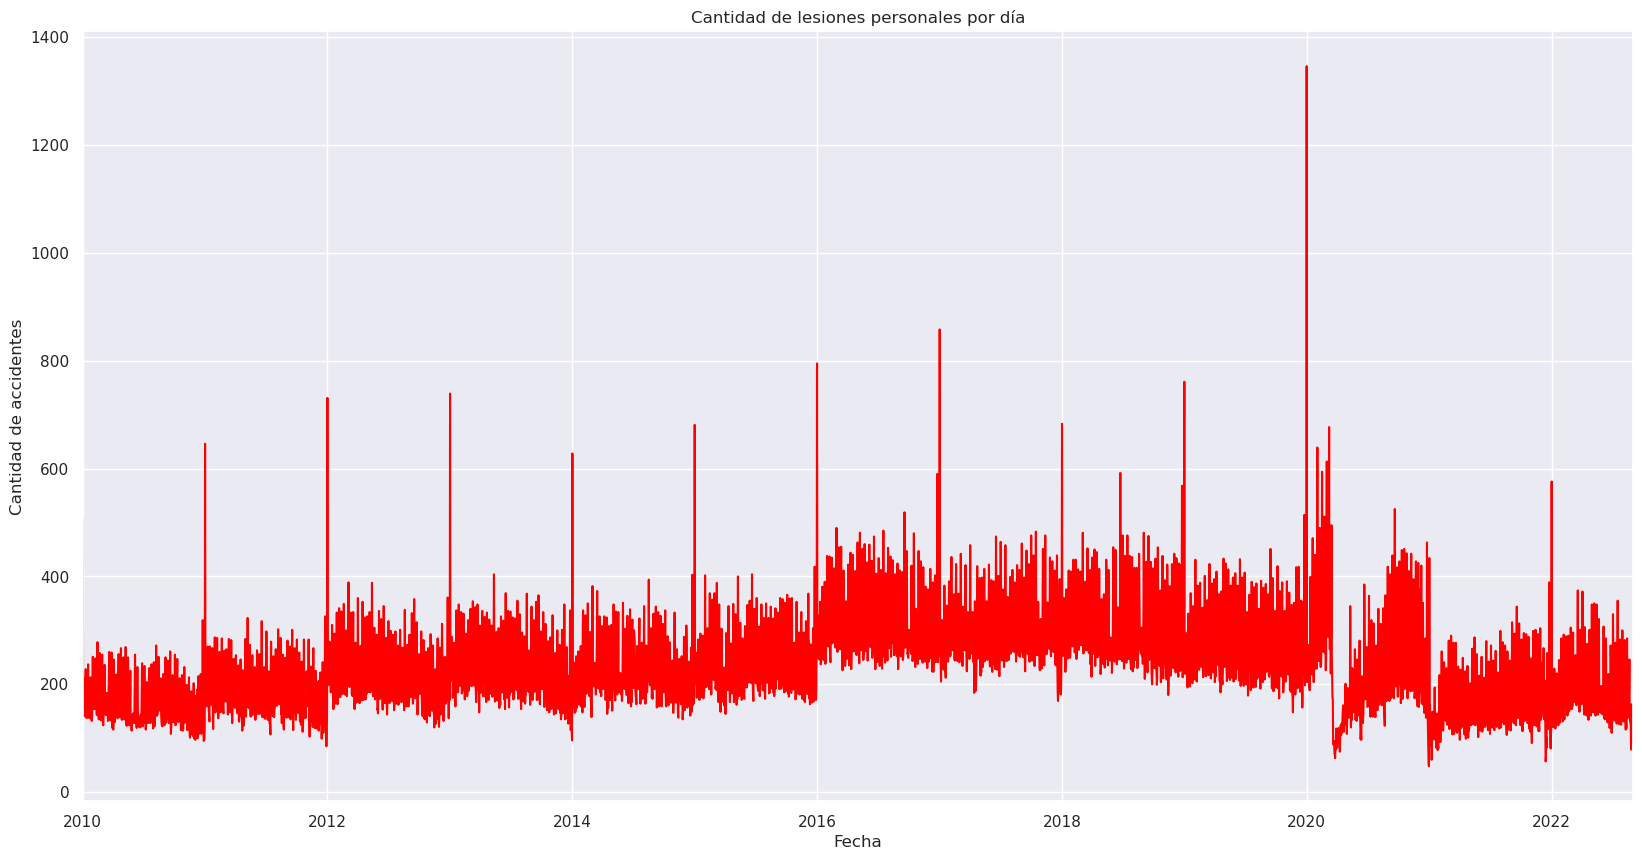

In [ ]:
data_cleaned.groupby(by=data_cleaned.index)["CANTIDAD"].count().plot(figsize=(20,10), title="Cantidad de lesiones personales por día", color="red", xlabel="Fecha", ylabel="Cantidad de accidentes");

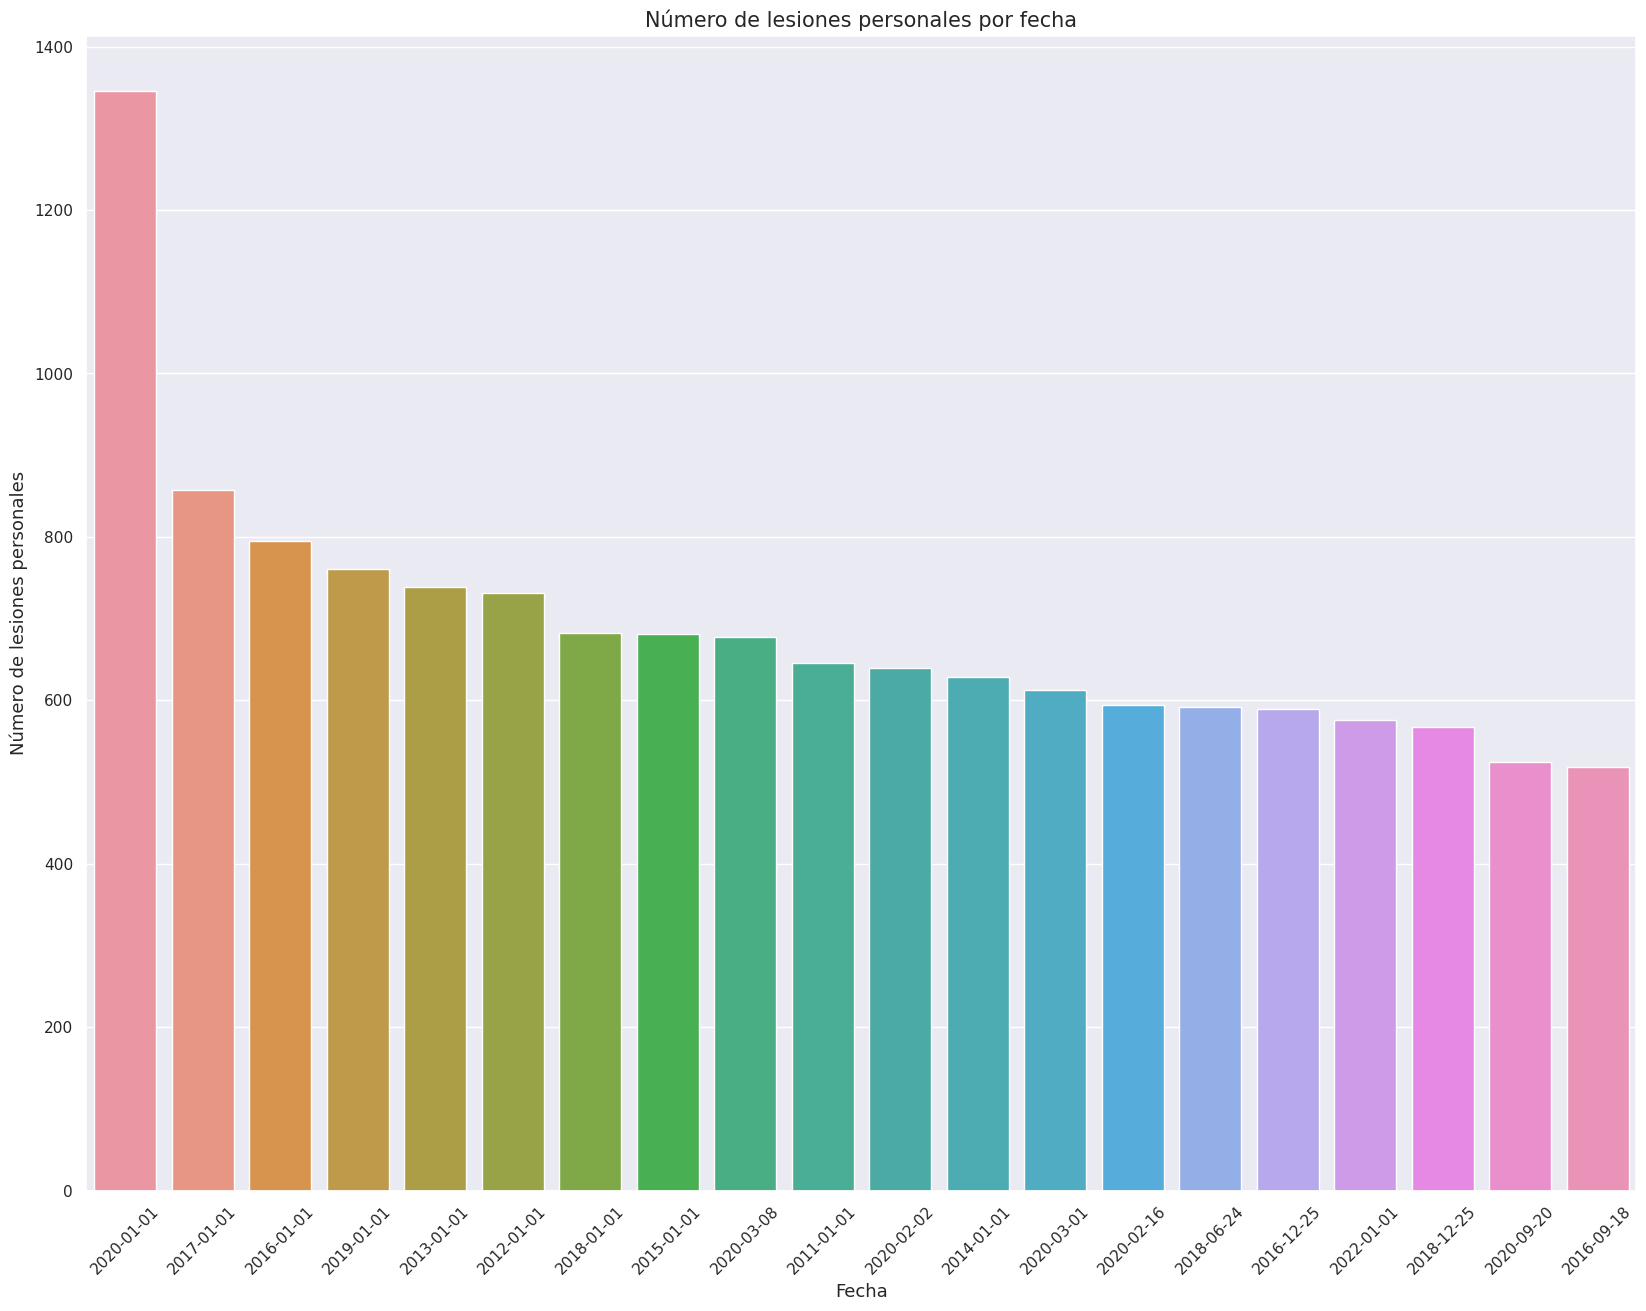

In [ ]:
# Como encontramos que en ciertas fechas hay un pico de accidentes, vamos a ver en que fechas se presentan
# Agregamos una columna diciendo el dia de la semana
data_cleaned['DIA SEMANA'] = pd.to_datetime(data_cleaned['FECHA HECHO']).dt.day_name(locale='es_CO.utf8')
# Mostrar las fechas con más delitos
# Creamos un dataframe con la cantidad de delitos por fecha
data_df = pd.DataFrame(data_cleaned.groupby(by=data_cleaned.index)["CANTIDAD"].count())
data_df.index = data_df.index.date
data_df
#plot = data_df.sort_values(by="ARMAS MEDIOS", ascending=False).head(10).plot(kind="bar", figsize=(20,10), fontsize=13, rot=45, xlabel="Fecha", ylabel="Número de lesiones personales", title="Número de lesiones personales por fecha").legend(["Heridos"])
# Limitamos el resultado a las 10 fechas con más accidentes, ordenadas de mayor a menor y mostramos el gráfico
sns.barplot(x=data_df.index, y=data_df["CANTIDAD"], data=data_df, order=data_df.sort_values(by="CANTIDAD", ascending=False).head(20).index)
sns.set(rc={'figure.figsize':(20,15)})
plt.xlabel("Fecha", fontsize=13)
plt.ylabel("Número de lesiones personales", fontsize=13)
plt.title("Número de lesiones personales por fecha", fontsize=15)
plt.xticks(rotation=45);

In [ ]:
data_cleaned

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD,DIA SEMANA
FECHA HECHO,,,,,,,,
2010-01-01,ANTIOQUIA,GIRARDOTA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,2,Viernes
2010-01-01,ANTIOQUIA,GIRARDOTA,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ANTIOQUIA,MUTATÁ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ANTIOQUIA,NECOCLÍ,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,1,Viernes
2010-01-01,ATLÁNTICO,BARRANQUILLA (CT),ARMA BLANCA / CORTOPUNZANTE,2010-01-01,ADULTOS,LESIONES PERSONALES,2,Viernes
...,...,...,...,...,...,...,...,...
2022-05-03,CESAR,VALLEDUPAR (CT),VENENO,2022-05-03,ADULTOS,LESIONES PERSONALES,1,Martes
2022-06-16,HUILA,OPORAPA,VENENO,2022-06-16,ADOLESCENTES,LESIONES PERSONALES,1,Jueves
2022-04-17,TOLIMA,IBAGUÉ (CT),VENENO,2022-04-17,ADULTOS,LESIONES PERSONALES,1,Domingo


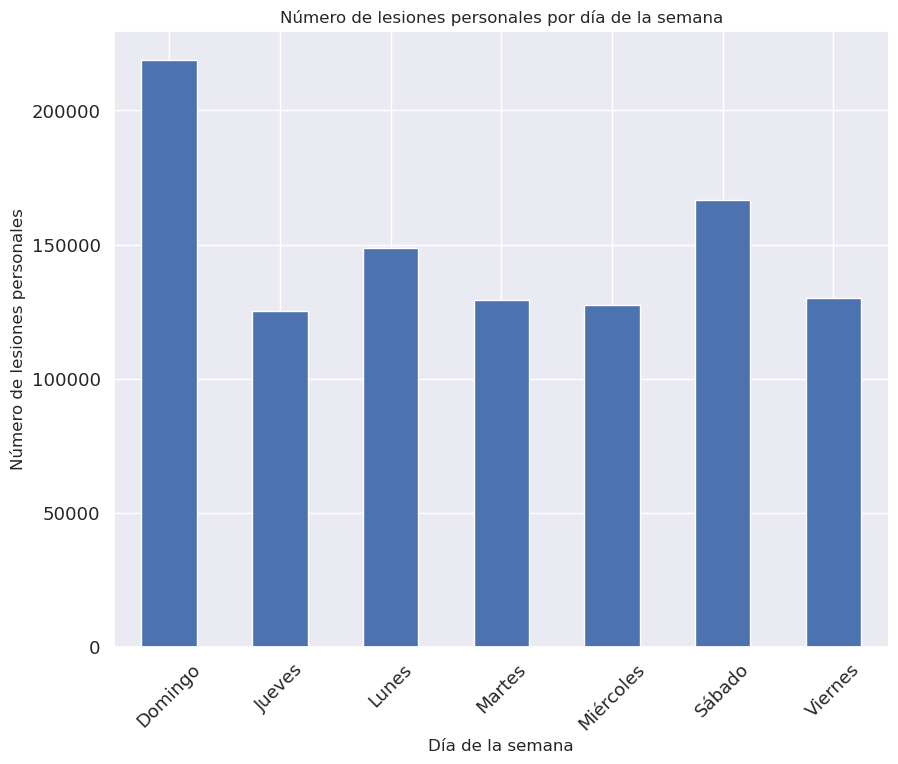

In [ ]:
# Vamos a ver en que días de la semana se presentan más accidentes
data_cleaned.groupby(by=data_cleaned['DIA SEMANA'])["CANTIDAD"].count().plot(kind="bar", figsize=(10,8), fontsize=13, rot=45, xlabel="Día de la semana", ylabel="Número de lesiones personales", title="Número de lesiones personales por día de la semana");

In [ ]:
# Mostramos cuantas de estas lesiones son por accidentes de tránsito o por lesiones personales
data_cleaned.groupby(by='DESCRIPCIÓN CONDUCTA')['ARMAS MEDIOS'].count()

DESCRIPCIÓN CONDUCTA
LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )    298705
LESIONES PERSONALES                               747580
Name: ARMAS MEDIOS, dtype: int64

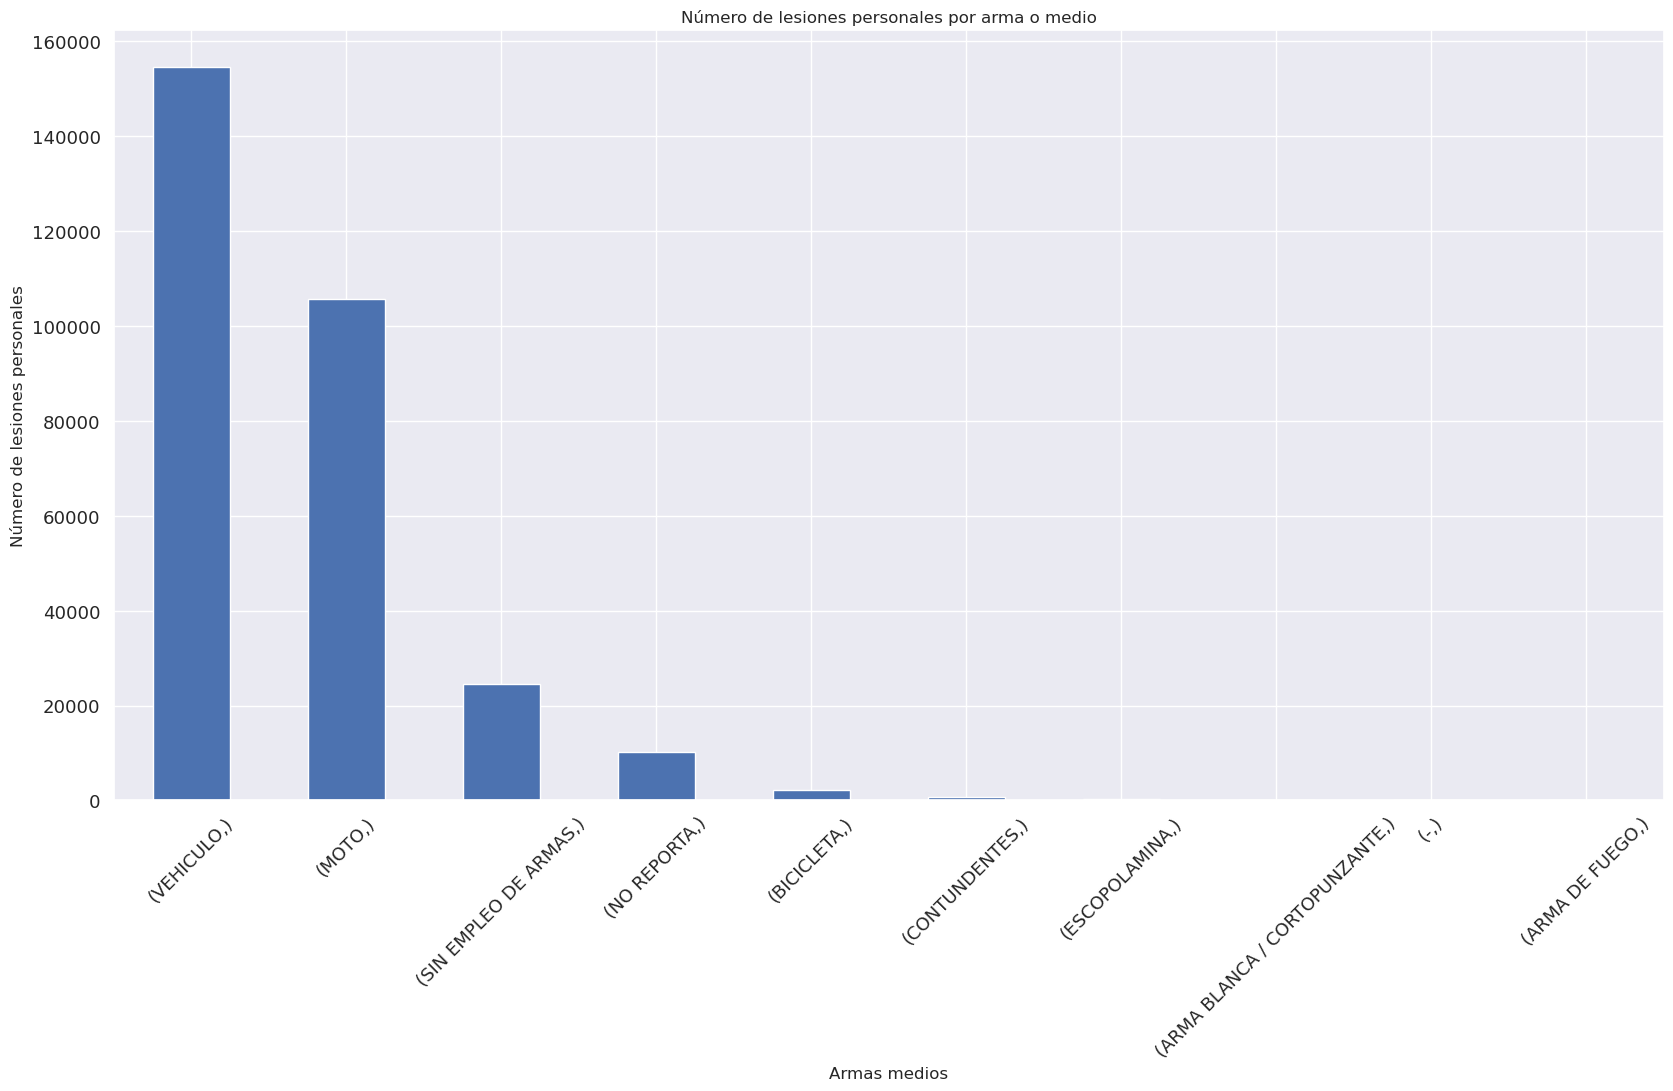

In [ ]:
# Graficamos el número que se da por lesiones culposas o por accidente de tránsito
data_cleaned[data_cleaned["DESCRIPCIÓN CONDUCTA"] == "LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO )"][["ARMAS MEDIOS"]].value_counts().plot(kind="bar", figsize=(20,10), fontsize=13, rot=45, xlabel="Armas medios", ylabel="Número de lesiones personales", title="Número de lesiones personales por arma o medio");

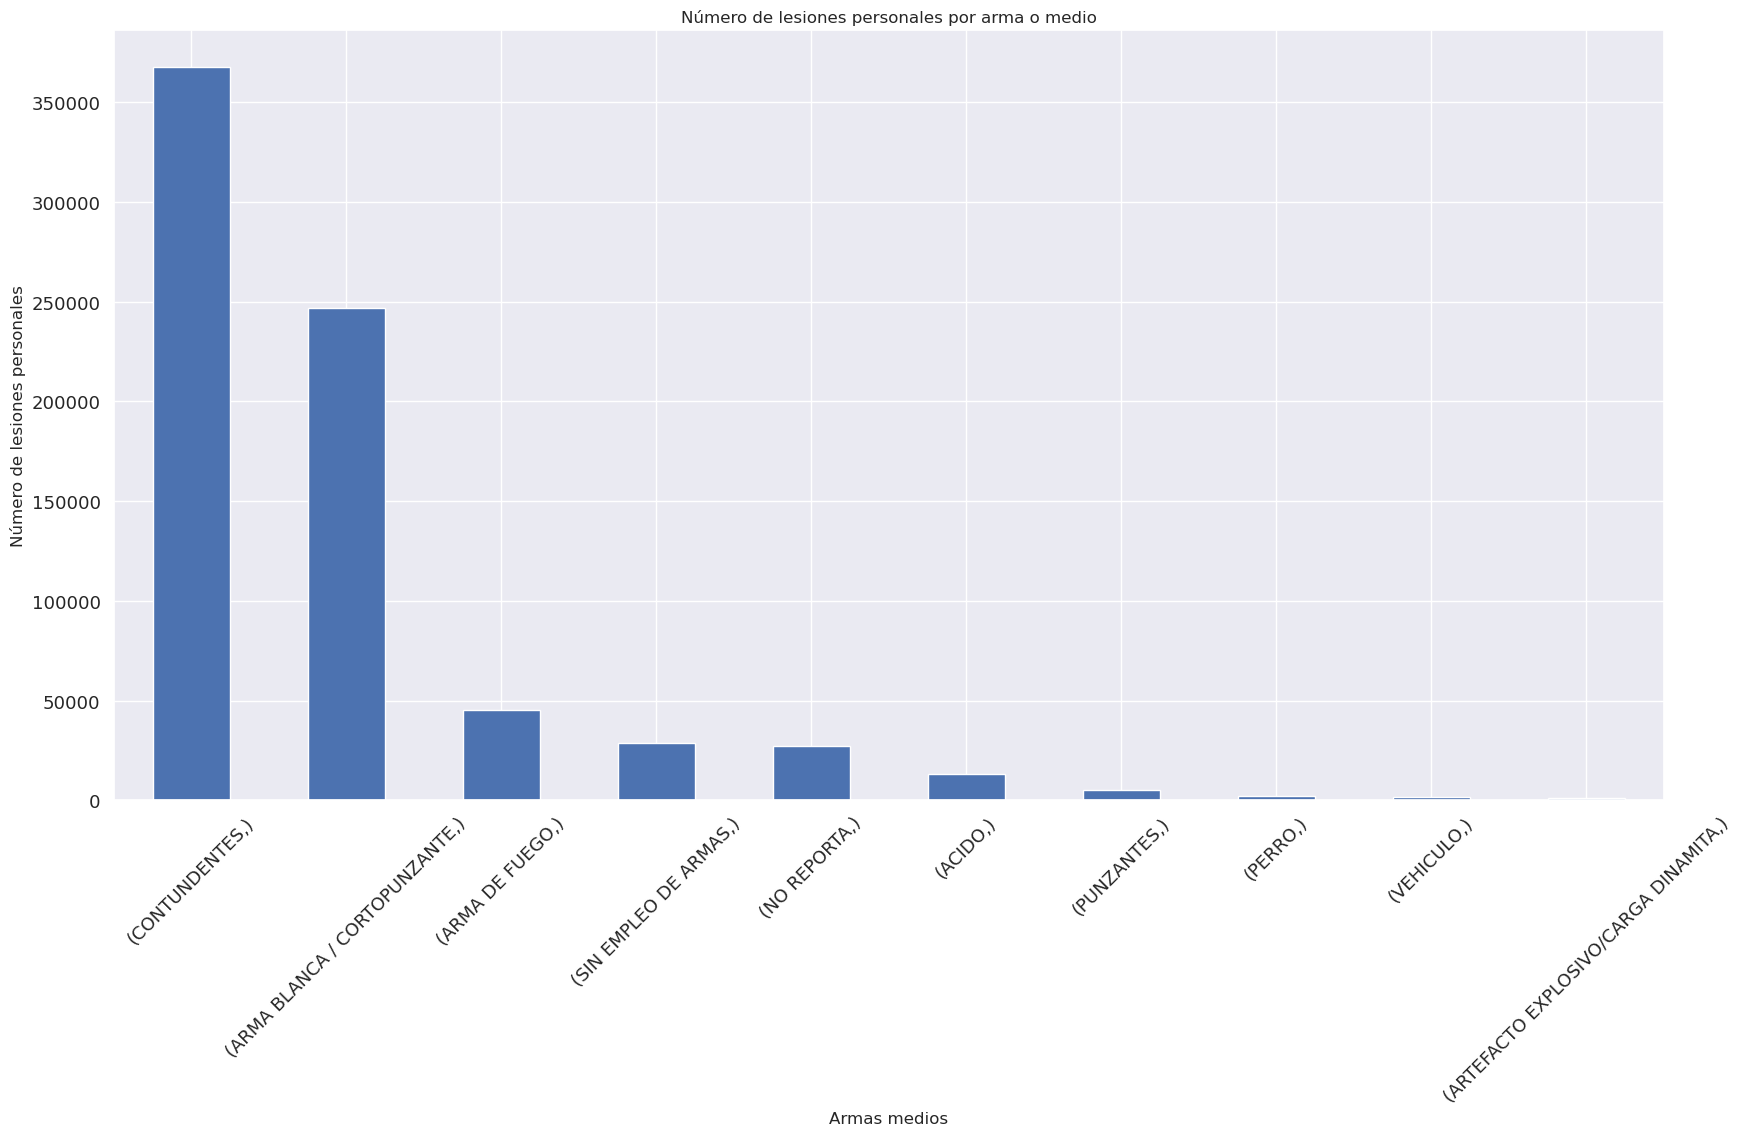

In [ ]:
# Graficamos el número que se da por lesiones personales, pero debido a que hay muchos datos de este tipo, vamos a limitar el resultado a los 10 más comunes
data_cleaned[data_cleaned["DESCRIPCIÓN CONDUCTA"] == "LESIONES PERSONALES"][["ARMAS MEDIOS"]].value_counts().head(10).plot(kind="bar", figsize=(20,10), fontsize=13, rot=45, xlabel="Armas medios", ylabel="Número de lesiones personales", title="Número de lesiones personales por arma o medio");

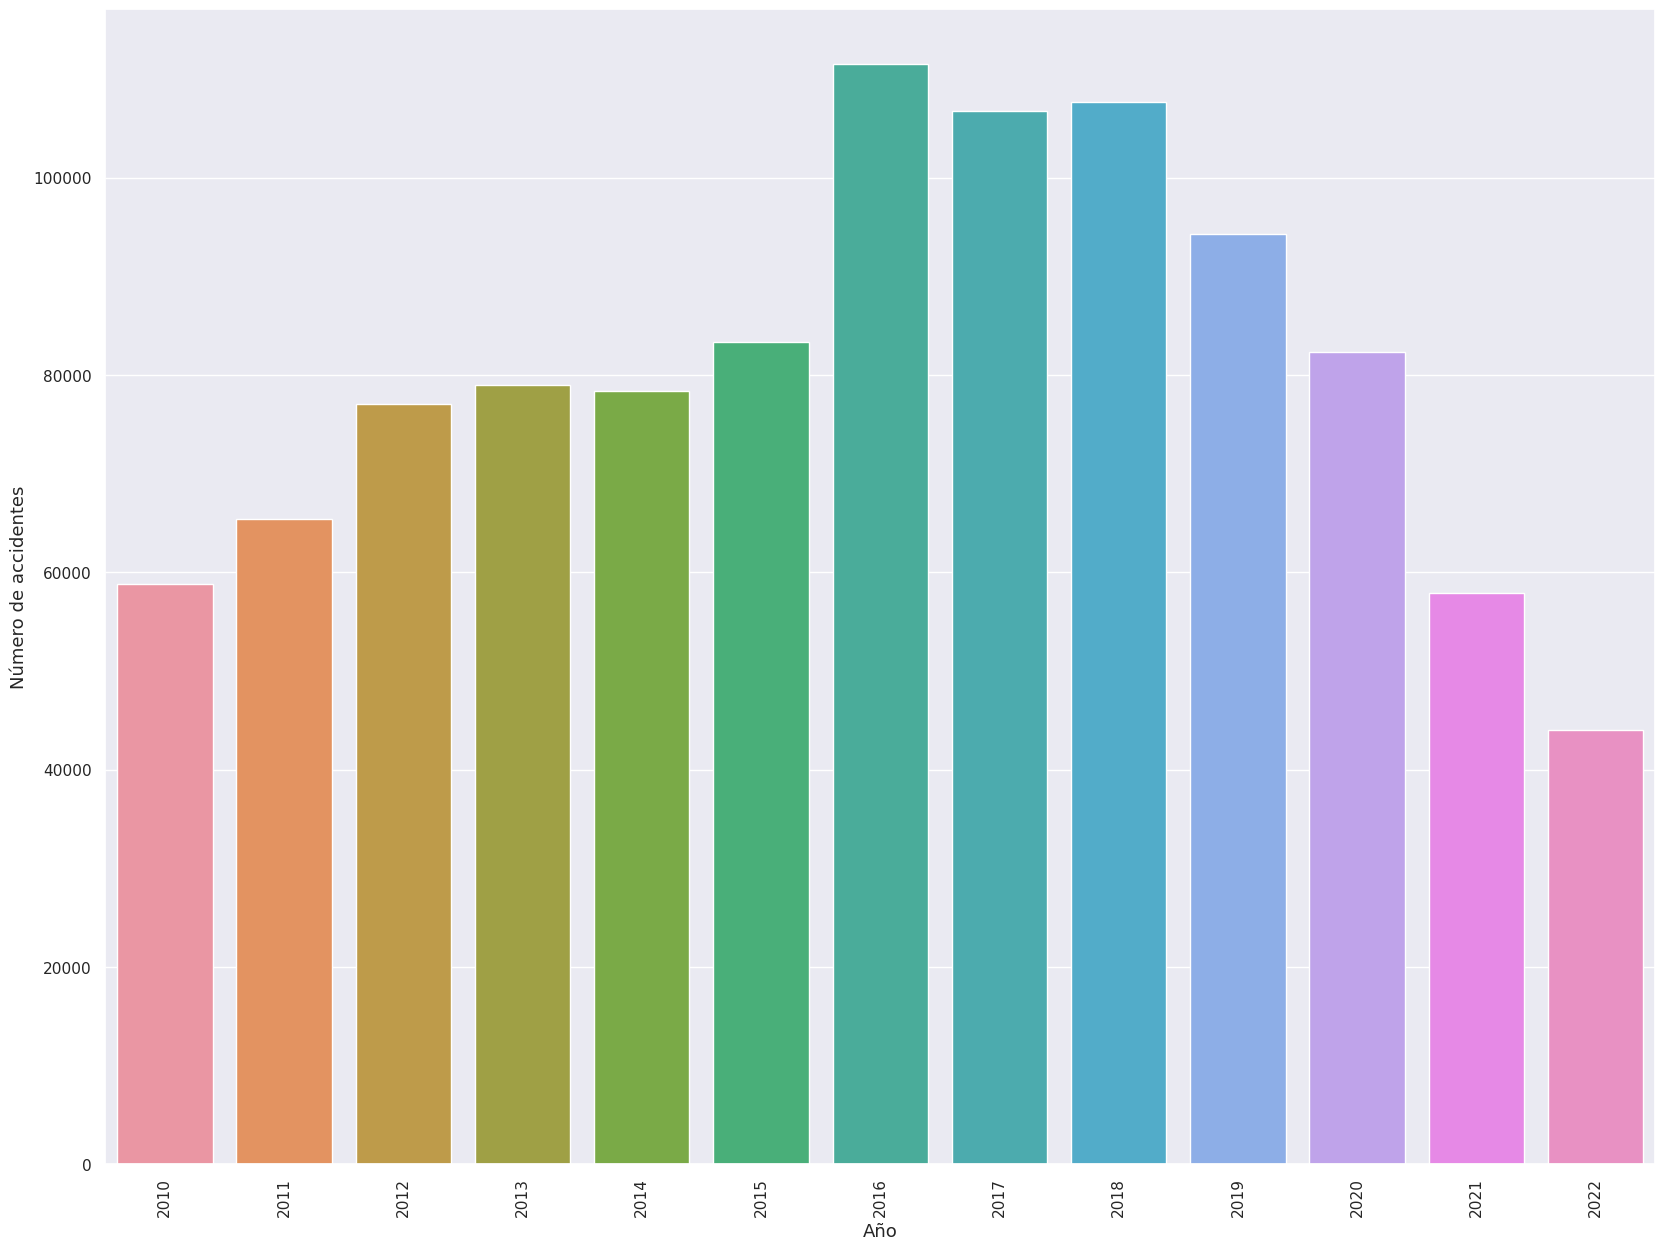

In [ ]:
# Vamos a ver la distribución de los datos por año
# Para ello, vamos a crear una tabla de frecuencias
# Primero, vamos a crear una tabla de frecuencias de la variable FECHA HECHO, pero solamente para el año
data_cleaned["FECHA HECHO"].dt.year.value_counts()
# Hacemos un gráfico de barras
sns.countplot(x=data_cleaned["FECHA HECHO"].dt.year)
plt.xlabel("Año", fontsize=13)
plt.ylabel("Número de accidentes", fontsize=13)
plt.xticks(rotation=90)
plt.show()

Con este grafico podemos ver que la mayoria de las lesiones ocurrieron en el año 2016, con esto tomaremos este año para seguir buscando datos

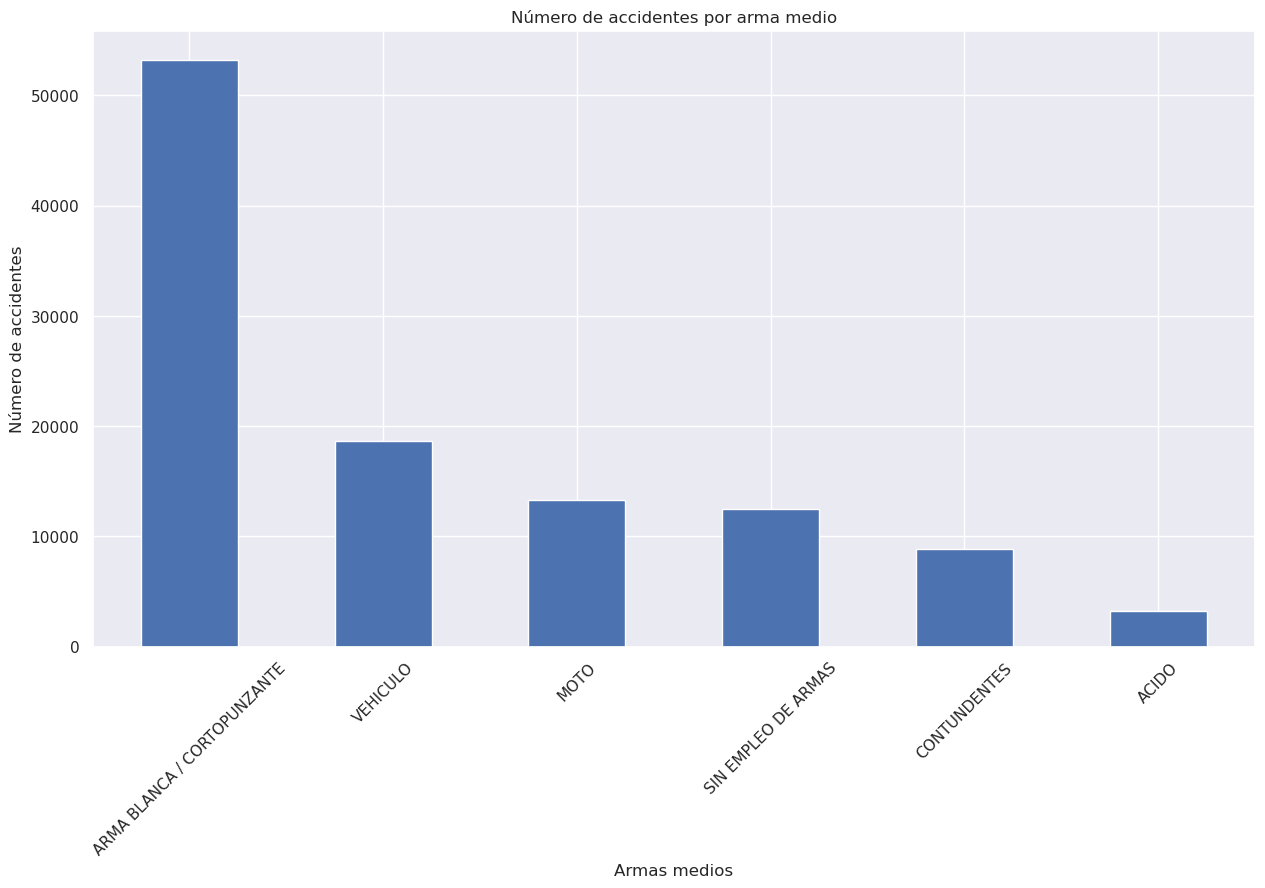

In [ ]:
# Filtraremos todos los datos para el año 2016
data_2016 = data_cleaned[data_cleaned["FECHA HECHO"].dt.year == 2016]
# Vamos a ver la distribución de los datos
# Para ello, vamos a crear una tabla de frecuencia de la variable ARMAS MEDIOS
# Debido a que hay muchas categorías y no todas tienen muchos datos, vamos a mostrar las 6 categorías con más datos
data_2016["ARMAS MEDIOS"].value_counts().head(6).plot(kind="bar", xlabel="Armas medios", ylabel="Número de accidentes", title="Número de accidentes por arma medio", figsize=(15,8), rot=45);

Con esto podemos ver que la mayoria de las lesiones que ocurrieron en el año 2016 fueron por arma blanca / cortopunzante

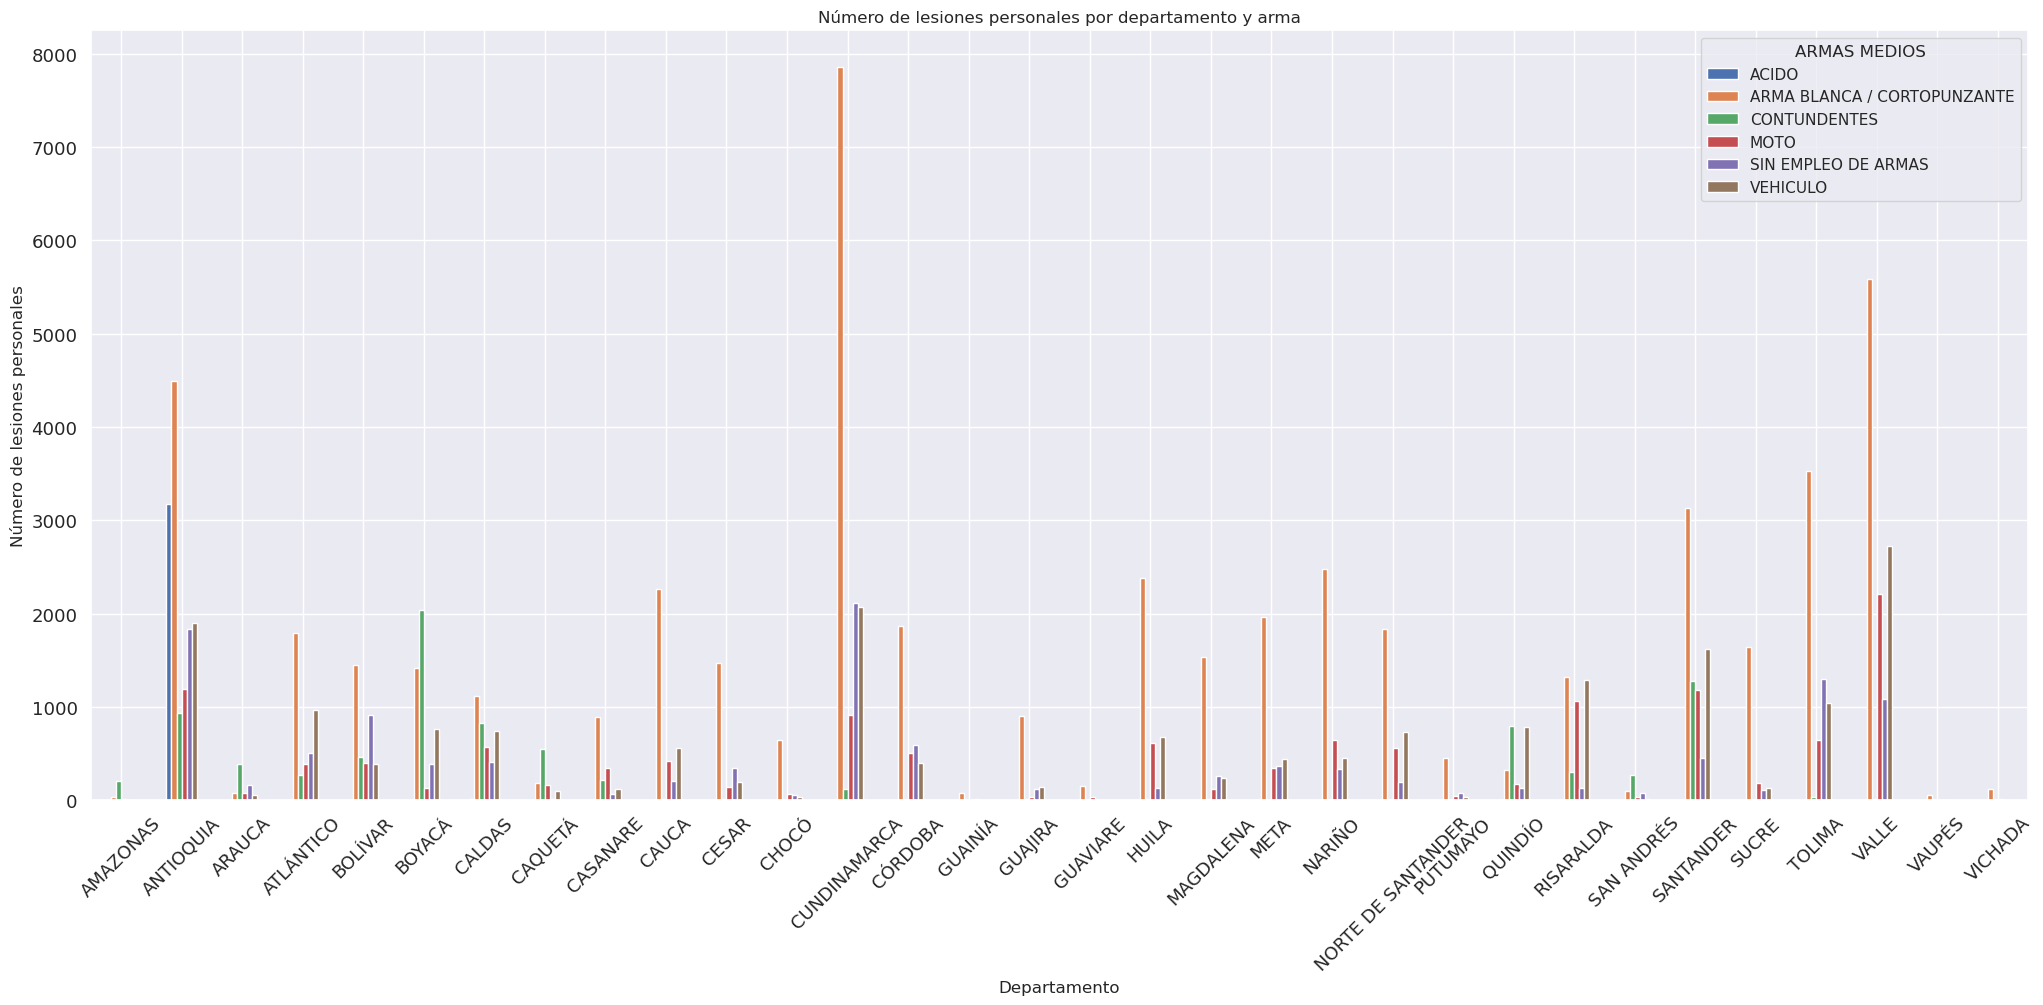

In [ ]:
# Filtraremos por Departamento y ARMAS MEDIOS para ver la distribución de los datos
data_2016_weapons = data_2016[data_2016["ARMAS MEDIOS"].isin(data_2016["ARMAS MEDIOS"].value_counts().head(6).index)]

# Con estos datos mostramos la distribución de los datos por departamento, incluyendo las 6 categorías de lesiones personales más comunes
data_2016_weapons_countries = data_2016_weapons[data_2016_weapons["DEPARTAMENTO"].isin(data_2016_weapons["DEPARTAMENTO"].value_counts().index)]
data_plotted = data_2016_weapons_countries.groupby(["DEPARTAMENTO", "ARMAS MEDIOS"]).size().sort_values(ascending=False)
data_plotted.unstack().plot(kind="bar", stacked=False, figsize=(25,10), fontsize=13, rot=45, xlabel="Departamento", ylabel="Número de lesiones personales", title="Número de lesiones personales por departamento y arma").legend;
# sns.catplot(x="DEPARTAMENTO", data=data_2016_weapons, kind="count", hue="ARMAS MEDIOS")


In [ ]:
# Ignorar esta celda
data_example = data_2016.groupby(["ARMAS MEDIOS"]).size().sort_values(ascending=False)
# (data_example / data_example.sum()) * 100
data_example.index.to_list()

['ARMA BLANCA / CORTOPUNZANTE',
 'VEHICULO',
 'MOTO',
 'SIN EMPLEO DE ARMAS',
 'CONTUNDENTES',
 'ACIDO',
 'NO REPORTA',
 'ARMA DE FUEGO',
 'BICICLETA',
 'ESCOPOLAMINA',
 'DIRECTA',
 'PERRO',
 'PUNZANTES',
 'COMBUSTIBLE',
 'ARTEFACTO EXPLOSIVO/CARGA DINAMITA',
 'GRANADA DE MANO',
 'AGUA CALIENTE',
 'MINA ANTIPERSONA',
 'ARMAS BLANCAS',
 'MEDICAMENTOS',
 'SUSTANCIAS TOXICAS',
 'GASES',
 'CUCHILLA',
 'CINTAS/CINTURON',
 'POLVORA(FUEGOS PIROTECNICOS)',
 'CARRO BOMBA',
 'ARTEFACTO INCENDIARIO',
 'PAPA EXPLOSIVA',
 'ALUCINOGENOS',
 'JERINGA']

Con este grafico podemos ver que la mayoria de las lesiones que ocurrieron en el año 2016 ocurrieron en Antioquia, seguido de Cundinamarca y Valle del Cauca.
Siendo las tres principales causas en estas regiones:
- Arma blanca / cortopunzante
- Vehiculo
- Sin empleo de armas
- Moto

In [ ]:
# Mostrar las fechas con mas casos de lesiones personales junto con el arma medio usado
data_2016.groupby(by=data_2016.index)[["ARMAS MEDIOS"]].count().sort_values(by="ARMAS MEDIOS", ascending=False).head(10)
# Mostrar valores para cada arma medio
data_2016.groupby(by=data_2016.index)[["ARMAS MEDIOS"]].value_counts().sort_values(ascending=False)

FECHA HECHO  ARMAS MEDIOS                
2016-01-01   ARMA BLANCA / CORTOPUNZANTE     455
2016-12-25   ARMA BLANCA / CORTOPUNZANTE     320
2016-09-18   ARMA BLANCA / CORTOPUNZANTE     290
2016-05-08   ARMA BLANCA / CORTOPUNZANTE     274
2016-02-28   ARMA BLANCA / CORTOPUNZANTE     263
                                            ... 
2016-10-04   COMBUSTIBLE                       1
2016-05-15   ARMAS BLANCAS                     1
             ARMA DE FUEGO                     1
2016-10-05   NO REPORTA                        1
2016-12-31   POLVORA(FUEGOS PIROTECNICOS)      1
Length: 3114, dtype: int64